In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/My Drive/vianie_ASTRO361/Lab 6 Solar Spectroscopy/

/content/drive/My Drive/vianie_ASTRO361/Lab 6 Solar Spectroscopy


In [ ]:
# Setup
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
import csv
from glob import glob
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

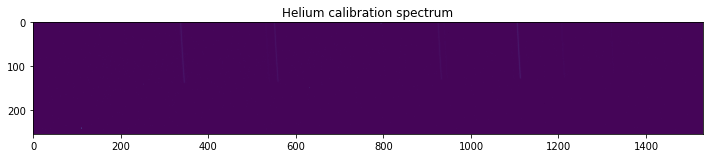

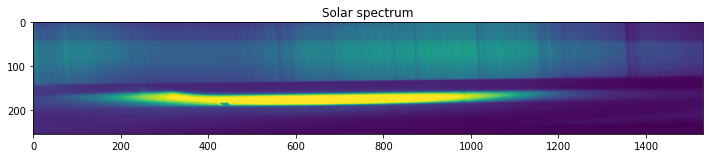

In [ ]:
# Data import
datadir='Solar Spectroscopy Data 2020 October 08/'

arc_he = []
sky = []
sky2 = []

# Sky1
file = glob(datadir+'239*')
sky,header_sky = fits.getdata(file[0],header=True)

# Sky2
file2 = glob(datadir+'238*')
sky2,header_sky2 = fits.getdata(file2[0],header=True)


############################ HELIUM ###########################

file = glob(datadir+'236*')
arc_he, header_arc_he = fits.getdata(file[0],header=True) 


# flip the y-axis since we want wavelength increase to the right.
arc_he = np.flip(arc_he,axis=1)
sky = np.flip(sky,axis=1)
sky2 = np.flip(sky2,axis=1)

# Display the data
plt.imshow(arc_he)
plt.title("Helium calibration spectrum")
plt.show()
plt.imshow(sky)
plt.title("Solar spectrum")
plt.show()

Take a look and try to intepret what you see.  Which way is the wavelength direction? which is the slit direction?

You can see from the helium image that the slit goes from about row 0-130.  Notice there is also a small tilt. Normally we need to correct for that tilt, but here lets just extract a few rows over which the tilt should be neglible.  

If you have time, you could instead shift each row so that peak in the brightest helium line is always on the same column using np.roll(). Then you could use more of the flux and get higher signal-to-noise.


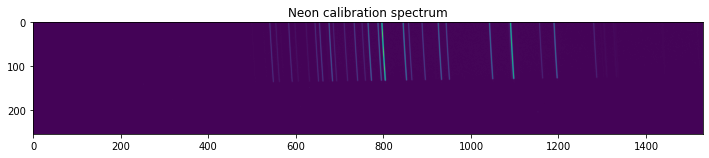

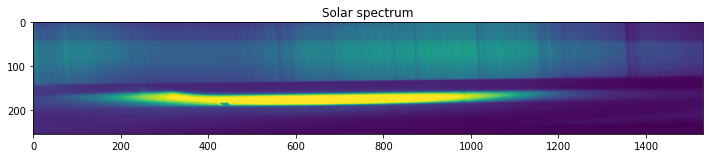

In [ ]:
# Data import

arc_ne = []

############################ NEON ###########################

file = glob(datadir+'235*')

# flip the y-axis since we want wavelength increase to the right.
arc_ne, header_arc_ne = fits.getdata(file[0],header=True) 
arc_ne = np.flip(arc_ne,axis=1)

# Display the data
plt.imshow(arc_ne)
plt.title("Neon calibration spectrum")
plt.show()
plt.imshow(sky)
plt.title("Solar spectrum")
plt.show()

In [ ]:
#header_sky # print header info for reference

# Create 1-D spectrum
Integrate flux along slit to improve SNR, but be careful of tilt

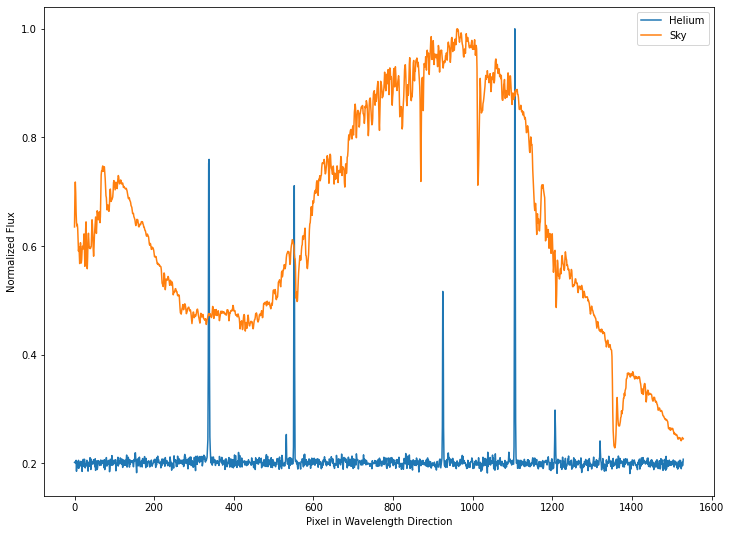

In [ ]:
############################ HELIUM ###########################

#choose range of rows to add
row0= 10
row1= 20

#now average counts on rows rows0 to rows1
he_arc_spec=np.mean(arc_he[row0:row1,:],axis=0)
sky_spec=np.mean(sky[row0:row1,:],axis=0)
sky_spec2=np.mean(sky2[row0:row1,:],axis=0)
plt.plot(he_arc_spec/he_arc_spec.max(),label='Helium')
plt.plot(sky_spec/sky_spec.max(),label='Sky')
plt.xlabel('Pixel in Wavelength Direction')
plt.ylabel('Normalized Flux')
plt.legend();
plt.show()

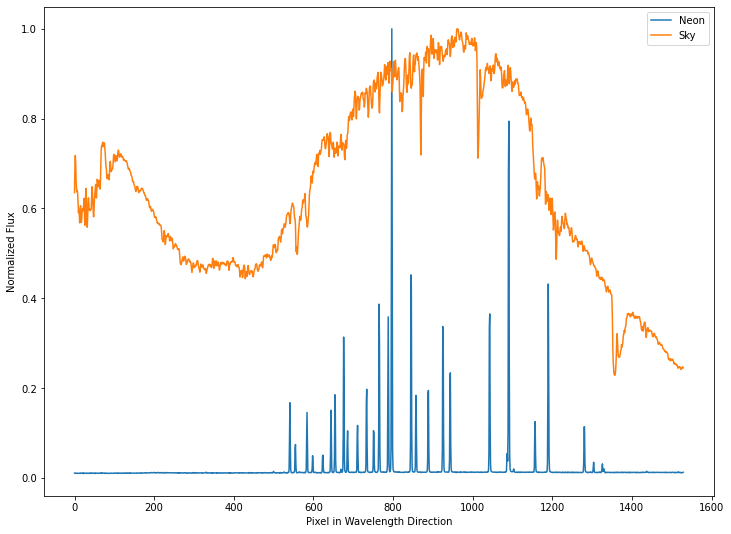

In [ ]:
############################ NEON ###########################

#now average counts on rows rows0 to rows1
ne_arc_spec=np.mean(arc_ne[row0:row1,:],axis=0)
plt.plot(ne_arc_spec/ne_arc_spec.max(),label='Neon')
plt.plot(sky_spec/sky_spec.max(),label='Sky')
plt.xlabel('Pixel in Wavelength Direction')
plt.ylabel('Normalized Flux')
plt.legend();
plt.show()

Hopefully you can see a series of spikes from the helium emission lines and more smooth, but jagged, spectrum from the sky (solar spectrum).

Now lets load in the helium lines and try to find some kind of correspondence.  Note from the manual the spectral resolution is around 0.2nm per pixel so we can use that as a starting point as we try to determine which helium transitions correspond to which spike in our spectrum

# Wavelength Calibration

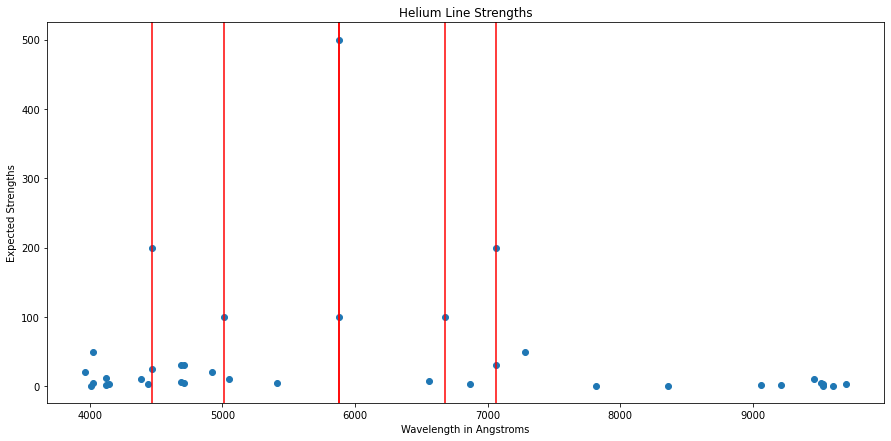

In [ ]:
plt.figure(figsize=(15,7))

############################ HELIUM ###########################

dt =  [('angstroms',float),('intensity',float)]
data1 = np.loadtxt('helium.txt', dtype=dt, skiprows=(0))

he_lambda=data1['angstroms']
he_intensity=data1['intensity']
plt.plot(he_lambda,he_intensity,'o')
plt.xlabel('Wavelength in Angstroms')
plt.ylabel('Expected Strengths')
plt.title('Helium Line Strengths')

# Overplot known he lines with intensities greater than a set value
intensity_min = 50
for i, col in enumerate(he_lambda):
    if he_intensity[i] > intensity_min:
        plt.axvline(col, color='r')

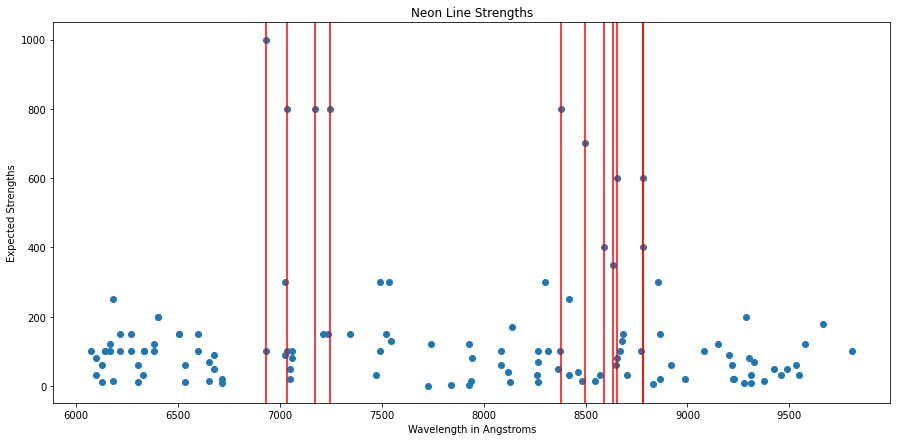

In [ ]:
plt.figure(figsize=(15,7))

############################ NEON ###########################

dt =  [('angstroms',float),('intensity',float)]
data2 = np.loadtxt('neon.txt', dtype=dt, skiprows=(0))

ne_lambda=data2['angstroms']
ne_intensity=data2['intensity']
plt.plot(ne_lambda,ne_intensity,'o')
plt.xlabel('Wavelength in Angstroms')
plt.ylabel('Expected Strengths')
plt.title('Neon Line Strengths')

intensity_min = 300

for b, col2 in enumerate(ne_lambda):
    if ne_intensity[b] > intensity_min:
        plt.axvline(col2, color='r')

In [ ]:
# Finding max intensity of Helium to anchor the fit to

#print(np.where(he_arc_spec == np.max(he_arc_spec))) # x0 [pixels]
#print(np.where(he_intensity == np.max(he_intensity))) # [pixels]
#print(he_lambda[19]) # Lambda0 [nm]

Text(0, 0.5, 'Intensity')

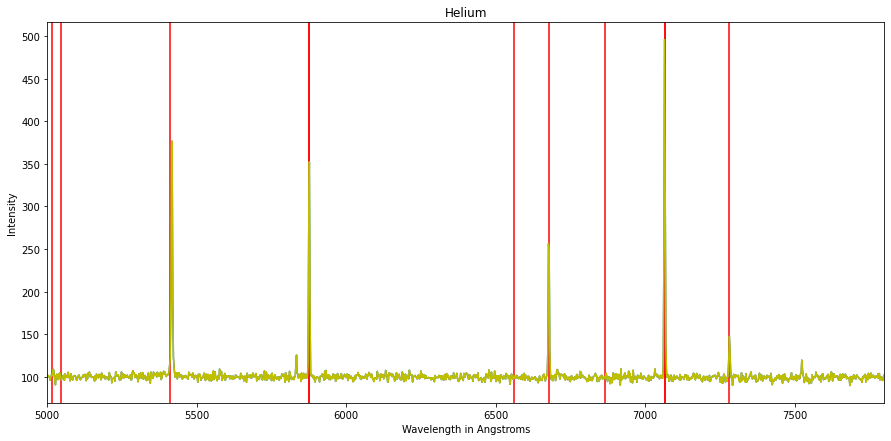

In [ ]:
############################ HELIUM ###########################

plt.figure(figsize=(15,7))

# lets start out with rough guess.
dimy= len(he_arc_spec)
x=np.arange(dimy)

#initial guess lambda = lambda0 + alpha (x-x0)
lambda_ang = 7037.4 +2.145*(x-1093)

plt.plot(lambda_ang,he_arc_spec)
plt.xlim(5000,7800)

# Overplot known he lines with intensities greater than a set value
intensity_min = 0
for i, col in enumerate(he_lambda):
    if he_intensity[i] > intensity_min:
        plt.axvline(col, color='r')
plt.plot(lambda_ang,he_arc_spec,'y')
plt.title("Helium")
plt.xlabel("Wavelength in Angstroms")
plt.ylabel("Intensity")

You try to find a good solution to these lines by shifting around and applying fine tuning to alpha.  For your lab, you need to also do this for the neon lines which are more plentiful and see if you get similar results.


In [ ]:
# Finding max intensity of Neon to anchor the fit to

#print(np.where(ne_arc_spec == np.max(ne_arc_spec))) # x0 [pixels]
#print(np.where(ne_intensity == np.max(ne_intensity))) # [pixels]
#print(ne_lambda[41]) # Lambda0 [nm] (37, predicted)

Text(0, 0.5, 'Intensity')

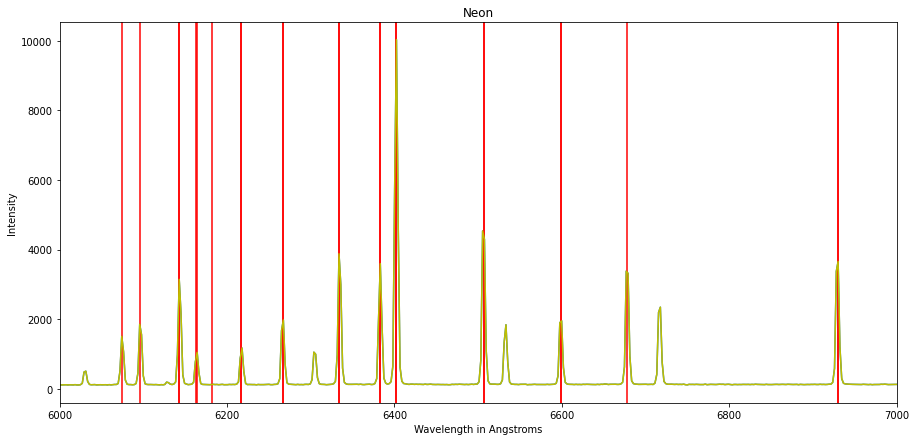

In [ ]:
############################ NEON ###########################

plt.figure(figsize=(15,7))

# lets start out with rough guess.
dimy= len(ne_arc_spec)
x=np.arange(dimy)

#initial guess lambda = lambda0 + alpha (x-x0)
lambda_ang2 = 7037.4 +2.145*(x-1093) 

plt.plot(lambda_ang2,ne_arc_spec)
plt.xlim(6000,7000)

# Overplot known ne lines with intensities greater than a set value
intensity_min = 70
for j, col2 in enumerate(ne_lambda):
    if ne_intensity[j] > intensity_min:
        plt.axvline(col2, color='r')
plt.plot(lambda_ang2,ne_arc_spec,'y')
plt.title("Neon")
plt.xlabel("Wavelength in Angstroms")
plt.ylabel("Intensity")

# Plotting a wavelength-calibrated solar spectrum

Now that you have a reasonable wavelength solution, you can plot your solar spectrum. Be sure it was flipped around the same way as you arcs were!
The manual says that the spectrum is only valid out to around 750nm, but I think it seem ok out to 780nm or so.  Check for yourself.

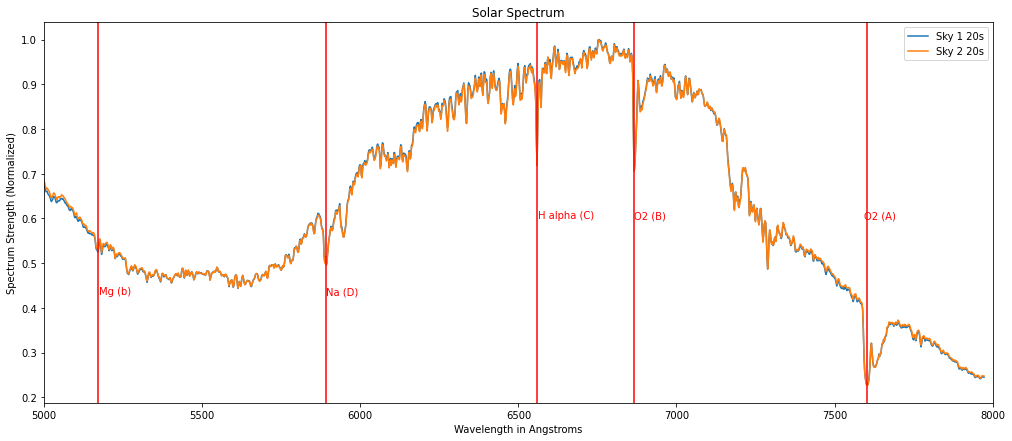

In [ ]:
plt.figure(figsize=(17,7))

# Sky 1 20s
sky_spec_norm = sky_spec/sky_spec.max()

# Sky 2 20s
sky_spec_norm2 = sky_spec2/sky_spec2.max()

############################ HELIUM ###########################

#plt.plot(lambda_ang,sky_spec_norm)

############################ NEON ###########################

#plt.plot(lambda_ang2,sky_spec_norm)

############################ SNR ###########################

plt.plot(lambda_ang, sky_spec_norm, label='Sky 1 20s')
plt.plot(lambda_ang2, sky_spec_norm2, label = 'Sky 2 20s')

############################ Features ###########################

plt.xlim(5000,8000)
plt.title("Solar Spectrum")
plt.xlabel("Wavelength in Angstroms")
plt.ylabel("Spectrum Strength (Normalized)")
plt.legend()

# http://astrosurf.com/spectrohelio/atlas-en.php
# H alpha (C) = 6562.81
# O2 (B) = 6867.19
# O2 (A) = 7593.7
# Na (D) = 5893
# Mg (b) = 5172.7

plt.axvline(6559.3, color='r')
plt.annotate('H alpha (C)', (6562.81,.6),size=10,color='red');

plt.axvline(6866.8, color='r')
plt.annotate('O2 (B)', (6867.19,.6),size=10,color='red');

plt.axvline(7603, color='r')
plt.annotate('O2 (A)', (7593.7,.6),size=10,color='red');
# From atmosphere

plt.axvline(5893, color='r')
plt.annotate('Na (D)', (5893,.43),size=10,color='red');

plt.axvline(5170, color='r')
plt.annotate('Mg (b)', (5172.7,.43),size=10,color='red');


In [ ]:
rms = np.std(sky_spec_norm2-sky_spec_norm)

snr = np.mean(sky_spec_norm)/np.mean(rms)
snr2 = np.mean(sky_spec_norm2)/np.mean(rms)
snr_avg = np.mean([snr,snr2])

print(snr,snr2, snr_avg)

163.6310307711202 163.64689898511836 163.63896487811928


# Notes

 although its lines generally are weaker and broader, further smeared by the limited spectral resolution.

one big feautre actually is just several blurred together 
line after line assoxiated with oxygen - double dip is related to the structure of the molecule

